<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latihan Praktikum Object Detection**

In [ ]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# akses ke drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Template Matching**

In [ ]:
# Membuat function untuk template matching
def template_matching(image, template, method,method_name):
  result = cv.matchTemplate(image, template, method)
  min_loc = cv.minMaxLoc(result)[2]
  top_left = min_loc
  h, w = template.shape[:2]
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(image, top_left, bottom_right, (0, 0, 255), 2)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  plt.figure(figsize=(15, 5))
  plt.suptitle(method_name,size=20)
  plt.subplot(121)
  plt.imshow(result, cmap='gray')
  plt.title('Matching Result')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122)
  plt.imshow(image)
  plt.title('Detected Point')
  plt.xticks([]), plt.yticks([])
  plt.show()

In [38]:
image = cv.imread('/content/drive/MyDrive/images/Object Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/images/Object Detection/cat2_templatejpg.jpg')

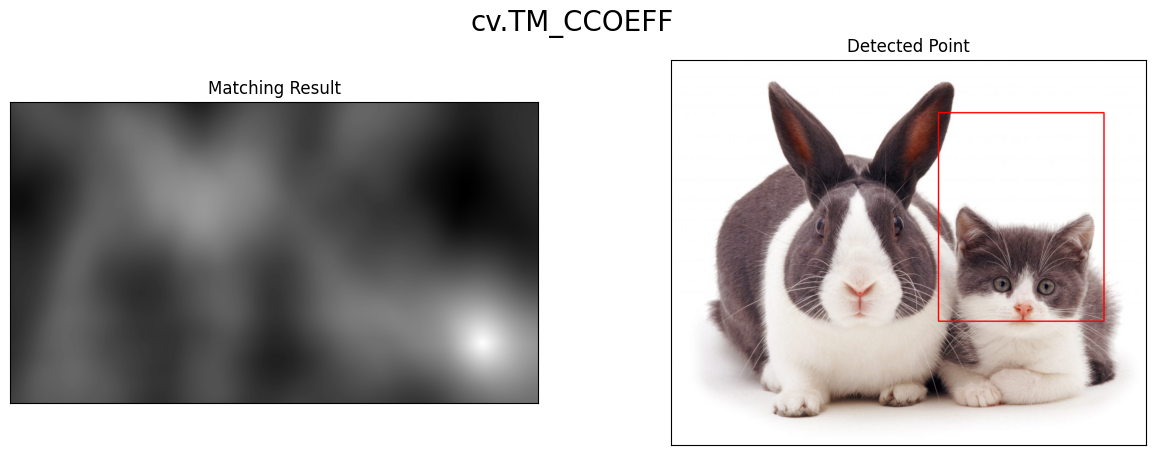

In [39]:
# TM_CCOEFF
template_matching(image.copy(), template.copy(), cv.TM_CCOEFF,"cv.TM_CCOEFF")

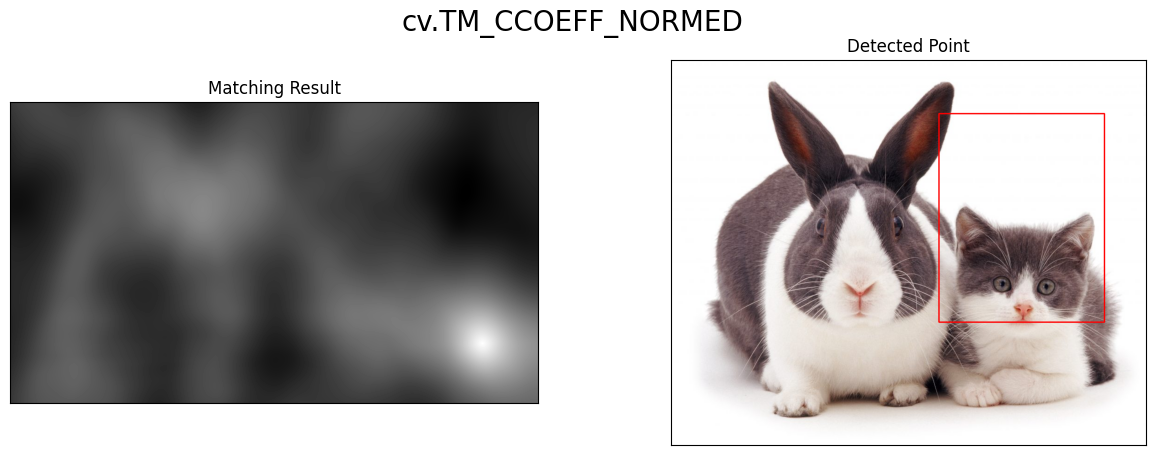

In [40]:
# TM_CCOEFF_NORMED
template_matching(image.copy(), template.copy(), cv.TM_CCOEFF_NORMED,"cv.TM_CCOEFF_NORMED")

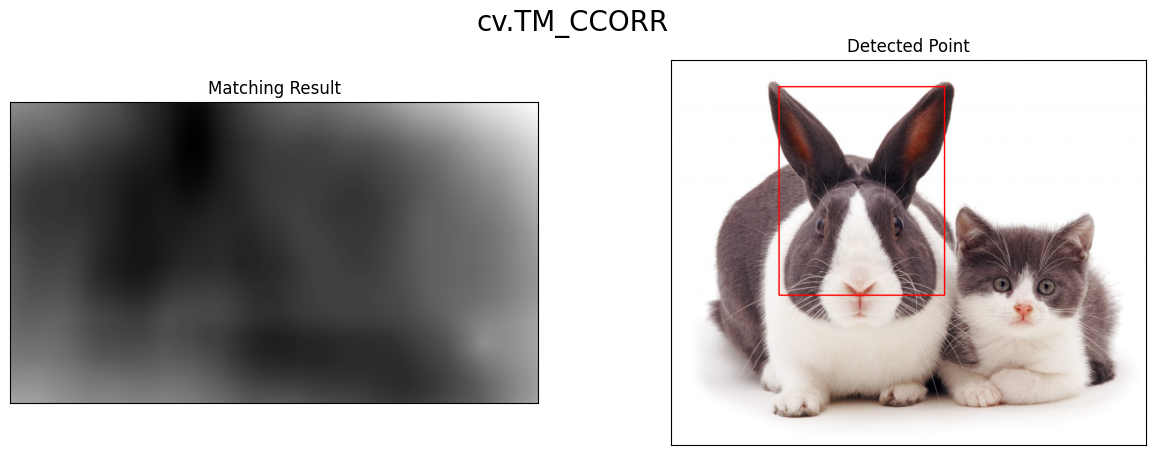

In [41]:
# TM_CCORR
template_matching(image.copy(), template.copy(), cv.TM_CCORR,"cv.TM_CCORR")


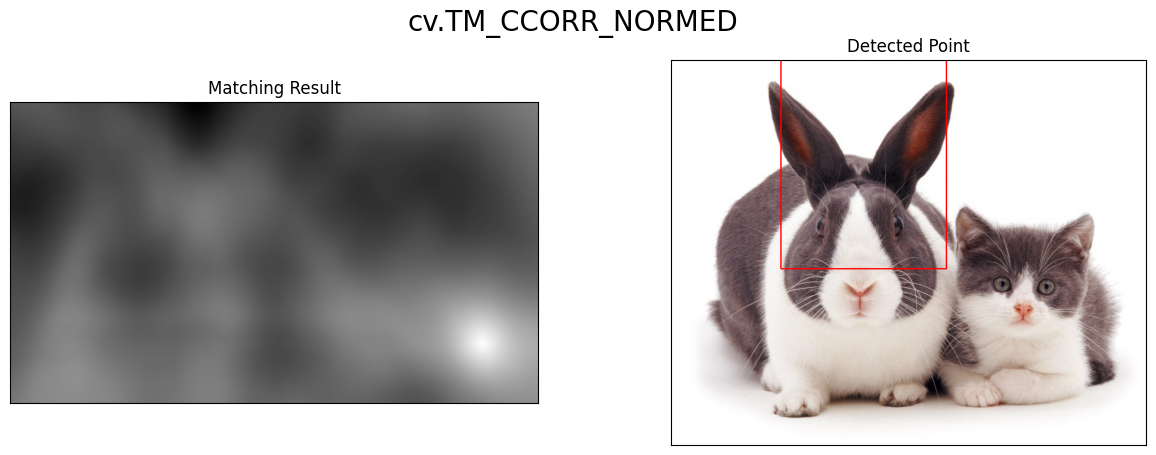

In [42]:
# TM_CCORR_NORMED
template_matching(image.copy(), template.copy(), cv.TM_CCORR_NORMED,"cv.TM_CCORR_NORMED")

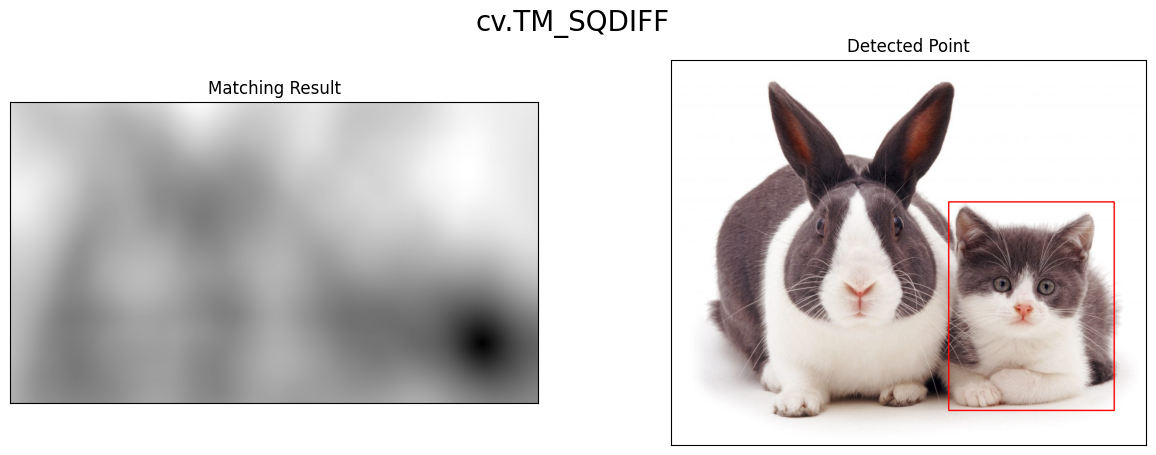

In [43]:
# TM_SQDIFF
template_matching(image.copy(), template.copy(), cv.TM_SQDIFF,"cv.TM_SQDIFF")

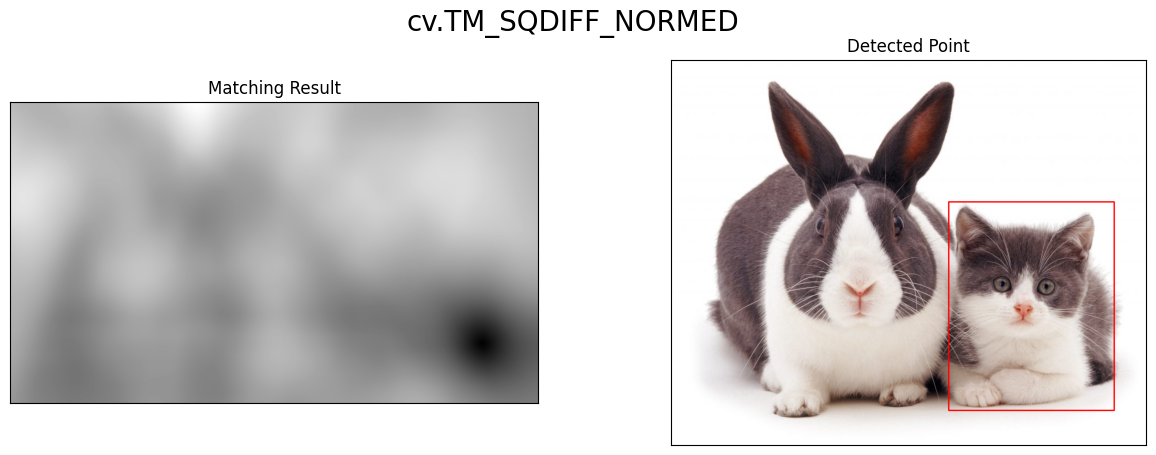

In [44]:
# TM_SQDIFF_NORMED
template_matching(image.copy(), template.copy(), cv.TM_SQDIFF_NORMED,"cv.TM_SQDIFF_NORMED")

Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template,

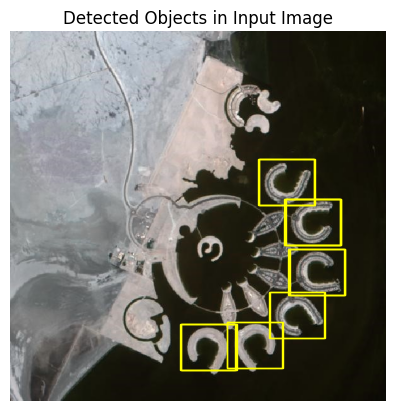

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,transform
import cv2 as cv

# Baca gambar input dan template
input_image = cv.imread('/content/drive/MyDrive/images/Object Detection/bahrain.jpg')
template_image = cv.imread('/content/drive/MyDrive/images/Object Detection/bahrain-template.jpg')

def template_matching(input_image, template_images, initial_threshold=350000, max_threshold=7000000, threshold_increment=50000):
    matched_locations = []

    # Konversi gambar input menjadi grayscale
    input_image_gray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

    for template_image in template_images:
        # Konversi template menjadi grayscale
        template_image_gray = cv.cvtColor(template_image, cv.COLOR_BGR2GRAY)

        # Dimensi template
        template_height, template_width = template_image_gray.shape

        # Mulai dengan threshold awal
        threshold = initial_threshold
        found_match = False

        while not found_match and threshold <= max_threshold:
            current_loop = 0
            for i in range(input_image_gray.shape[0] - template_height):
                for j in range(input_image_gray.shape[1] - template_width):
                    # Ambil subregion yang ukurannya sama dengan template
                    subregion = input_image_gray[i:i + template_height, j:j + template_width]

                    # Hitung SSD antara template dan subregion
                    ssd = np.sum((subregion - template_image_gray) ** 2)

                    if ssd < threshold:
                        current_loop += 1
                        # Jika match, simpan posisi koordinat
                        matched_locations.append((i, j))

                        # Setel flag bahwa ada match ditemukan
                        found_match = True

                        # Berhenti jika sudah mencapai jumlah yang cukup
                        if current_loop >= 5:
                            break
                if found_match:
                    break

            # Jika tidak ada match yang cukup, naikkan threshold
            if not found_match:
                threshold += threshold_increment

    return matched_locations

def rotate_image(image, angle):
  height, width = image.shape[:2]
  rotation_matrix = cv.getRotationMatrix2D((width / 2, height / 2), angle, 1)
  rotated_image = cv.warpAffine(image, rotation_matrix, (width, height))  # Tambahkan warpAffine untuk rotasi
  return rotated_image  # Pastikan untuk mengembalikan gambar yang dirotasi


augmented_templates = [
    template_image,
    np.fliplr(rotate_image(template_image, 110)),
    rotate_image(template_image, 300),
    np.fliplr(rotate_image(template_image, 160)),
    rotate_image(template_image,240),
    np.fliplr(rotate_image(template_image,230)),
]

matched_locations = template_matching(input_image, augmented_templates)

# Visualisasi hasil
fig, ax = plt.subplots()
ax.imshow(input_image, cmap='gray')

# Dapatkan template_width dan template_height dari template asli
template_height, template_width, _ = template_image.shape

for (i, j) in matched_locations:
    # Gambar kotak di sekitar lokasi yang terdeteksi
    rect = plt.Rectangle((j, i), template_width, template_height, edgecolor='yellow', facecolor='none', linewidth=1)
    ax.add_patch(rect)

plt.title("Detected Objects in Input Image")
plt.axis("off")
plt.show()